<a href="https://colab.research.google.com/github/sooonsyk/ESAA-22-2/blob/main/W11_HW_mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##6.토픽 모델링 - 20 뉴스 그룹
- 문서 집합에 숨어있는 주제 찾아내는 것
  - 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
  - LSA와 LDA 기법 사용 - 차원축소의 LDA와는 다름

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클, 야구, 그래픽스, 윈도우즈, 증동, 기독교, 전자공학, 의학 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian',
        'sci.electronics','sci.med']

#위에서 cats 변수로 기재된 카테고리만 추출, fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('header', 'footers', 'quotes'), categories = cats, random_state=0)

#LDA는 Count 기반 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


  - 7862개의 문서가 1000개의 피처로 구성

In [4]:
#LDA 토픽 모델링 - 8개 주제 추출했으니까 n_components 8로 설정
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [5]:
#lda 객체가 fit 후에 가지는 components_ 속성 값은 개별 토픽별 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치 가짐
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.87175875e+02, 3.26401283e+02, 1.67643972e+02, ...,
        7.19452113e+01, 1.25032429e-01, 1.25031801e-01],
       [1.25100534e-01, 1.25200157e-01, 1.25116306e-01, ...,
        5.23417043e+00, 1.25013172e-01, 1.25003054e-01],
       [8.10165562e+01, 1.29756513e+01, 1.58877134e+01, ...,
        2.02263029e+01, 1.25006040e-01, 1.25000074e-01],
       ...,
       [4.47519574e+01, 2.07610664e-01, 4.16627335e+00, ...,
        6.91641165e+00, 1.25006504e-01, 1.25000079e-01],
       [3.40790460e+01, 1.68526498e+01, 1.07933631e+01, ...,
        6.35434267e+01, 1.25001835e-01, 1.25001866e-01],
       [1.25080974e-01, 2.07187470e+02, 1.25006033e-01, ...,
        6.49764265e+01, 2.62124935e+02, 2.49124958e+02]])

  - 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값 가지고 있음
  - 이 값만으로는 연고나도 보기 어려우므로 각 토픽별 연관도 높은 순으로 나열

In [6]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    #components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    #top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)
  
#CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

#토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
israel israeli jews 1993 jewish 10 new 00 arab research health medical 000 cancer york
Topic # 1
edu organization university posting nntp nntp posting host posting host organization university cs distribution reply edu organization state university lines
Topic # 2
edu graphics window mit available server ftp software com mit edu data motif use mail pub
Topic # 3
god people think don does know just say believe jesus organization church like did way
Topic # 4
file image jpeg program use color output gif files bit format images entry display programs
Topic # 5
com organization like use dos know just don does help time ve used problem good
Topic # 6
organization com don year bike just uk good think game time like reply sun ac
Topic # 7
armenian people armenians said turkish turkey armenia serdar argic muslim government serdar argic went genocide didn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- 0 : 명확하지 않고 일반적인 단어가 주를 이룸
- 1 : 명확하게 컴퓨터 그래픽스 주제어 추출됨
- 2 : 기독교 관련
- 3 : 의학 관련
- 4 : 윈도우 운영체제
- 5 : 일반적인 단어
- 6 : 중동 분쟁
- 7  : 애매, 윈도우 운영체제 관련 
- 0,5,7 에서 애매한 주제어 추출함

###8. 문서 유사도



####문서 유사도 측정 방법 - 코사인 유사도
- 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- 두벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용

####두 벡터 사잇각
- $A * B = ||A||||B||cos \theta$
- $similarity = cos\theta = \frac{A*B}{||A||||B||}$
- 문서를 피처 벡터화 변환하면 매우 많은 희소 행렬 되기 쉬움 근데 여기에 유클리드 거리 기반 지표를 사용하면 정확도가 떨어지기 쉬움 그리고 빈도수에만 기반해서는 공정한 비교할 수 없음



In [7]:
import numpy as np

#코사인 유사도 구함
def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product/l2_norm

  return similarity

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)



(3, 18)


  - Tfidf 변환된 행렬은 희소행렬이므로 밀집 행렬로 변환한 뒤 배열로 변환 해서 cos_similarity 함수의 인자로 사용

In [9]:
#밀집행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 피처 벡터로 코사인 유사도
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402


In [10]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
similarity_simple = cos_similarity(vect3, vect2)
print('문장 2, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404
문장 2, 문장 3 Cosine 유사도 : 0.456


In [11]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)


[[1.         0.40207758 0.40425045]]


  - 사이킷런 제공 API, 두개의 입력 파라미터 - 비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬, 희소행렬 / 밀집행렬 행렬 / 배열 상관없음
  - 자신에 대한 유사도 측정, 1&2 유사도, 1&3 유사도
  - 쌍으로 코사인 유사도 값 제공 가능

In [12]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape : ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape :  (3, 3)


####Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [20]:
import string
import nltk
nltk.download('punkt')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
  return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/ESAA/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('||')[-1]
    filename = file_.split(',')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

- 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도 

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label=1인 데이터는 호텔로 군집화된 데이터임 DataFrame에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

#호텔로 군집화되 ㄴ데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('#### 비교 기준 문서명 ', comparison_docname, '와 타 문서와의 유사도 ####')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출,
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 22, 23, 26, 32, 36],
           dtype='int64')
#### 비교 기준 문서명  /content/drive/MyDrive/ESAA/OpinosisDataset1.0/topics/battery-life_ipod_nano_8gb.txt.data 와 타 문서와의 유사도 ####
[[1.         0.00944263 0.0266724  0.02414171 0.02487446 0.03161065
  0.12540554 0.0399867  0.2399319  0.87977888 0.20732385 0.04003521
  0.21210489 0.02242854 0.02133888 0.23154893 0.01663694 0.16882897
  0.02725314 0.80296942 0.03033191 0.01385451 0.31132244 0.03544857
  0.02590108]]


Text(0.5, 1.0, '/content/drive/MyDrive/ESAA/OpinosisDataset1.0/topics/battery-life_ipod_nano_8gb.txt.data')

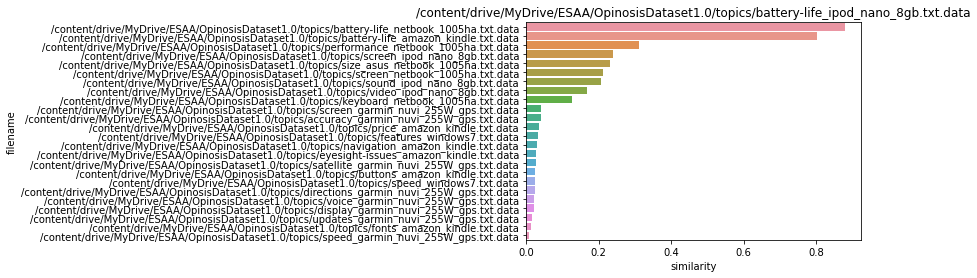

In [24]:
#유사도 높은 순으로 정렬하고 시각화

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

###9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

####한글 NLP 처리의 어려움
- 띄어쓰기와 다양한 조사 때문에 처리 어려움

####KoNLPy 소개
- 파이썬의 대표적인 한글 형태소 패키지

In [25]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 57.5 MB/s 


####데이터 로딩

In [27]:
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [28]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

 - null 값 공백으로 대체하고 문자가 아닌 숫자의 경우 단어적인 의미 부족하므로 공백으로 변환

In [29]:
import re

train_df = train_df.fillna(' ')

# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep="\t")
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# Id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

- Twitter 클래스 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형채로 토큰화해 list 객체로 변환함

In [30]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 현태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko


/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 메서드를 이용한 tokenizer를 사용
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [32]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1,3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
from sklearn.metrics import accuracy_score

#최종 감성 예측 분석 시행
# 학습 데이터를 적용한 TfidVectorizer를 이용해 텍스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86186
